In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Different to before, we have now a non-linear dependency between x & y...

In [2]:
N = 10

X = np.sort(2 * np.random.rand(N, 1), axis=0)
y = 4 + 3 * X + 5*X**2 + np.random.randn(N, 1)

In [3]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[2.94312554] [[6.83415557 3.18976999]]


Predicting as before and we see that the fit is quite good

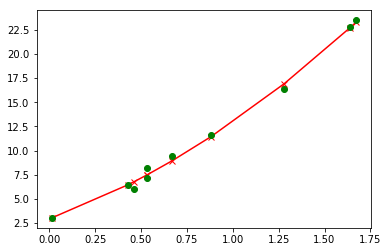

In [4]:
ypred = lin_reg.intercept_ + lin_reg.coef_[0][0]*X + lin_reg.coef_[0][1]*X**2
plt.plot(X, ypred, '-rx', X, y,'go')

Now let's increase the polynom degree to 10 and fit the data

In [5]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[-5678.44411542] [[   477102.67220923  -4436358.00218941  17455821.5606301
  -34766547.6063519   31984944.19651773   1369293.55661074
  -31909481.9368033   30001285.55292651 -12008456.58969282
    1835602.54996584]]


... and we run into a classical overfitting - look at the coefficient values! However, since polydegree = number of data points, we get a perfect match

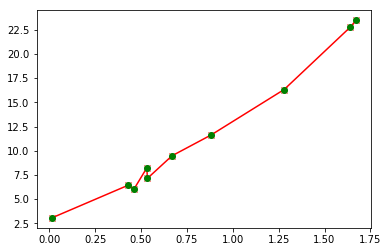

In [6]:
# ypred = lin_reg.intercept_ + np.sum([lin_reg.coef_[0][i]*X**(i+1) for i in range(10)], axis=0)
# simpler
ypred = lin_reg.predict(X_poly)
plt.plot(X, ypred, '-rx', X, y,'go')

Using Ridge regression; loss function = $MSE(\theta) + \frac{\alpha}{2} \sum_i \theta_i^2$. The $\alpha$ value causes the coefficients not to become "too big".


In [7]:
ridge_reg = Ridge(alpha=1, solver='cholesky',fit_intercept=False)
ridge_reg.fit(X_poly,y)
ridge_reg.coef_

array([[ 6.91368522,  3.68564136,  1.90091018,  0.84452249,  0.18793201,
        -0.21936488, -0.43109573, -0.4429313 , -0.21396364,  0.31263872]])

Prediction - The match is worse than before, but less erratic...

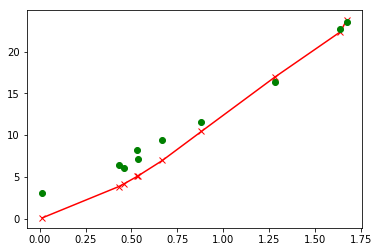

In [8]:
ypred_ridge = ridge_reg.predict(X_poly)
plt.plot(X, ypred_ridge, '-rx', X, y,'go')

In [9]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly, y)
lasso_reg.coef_

array([4.98811426e+00, 3.40468522e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.98320522e-02, 1.65676310e-02, 1.08421621e-03,
       0.00000000e+00, 0.00000000e+00])

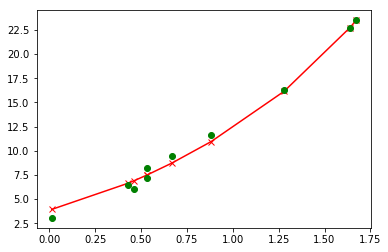

In [10]:
ypred_lasso = lasso_reg.predict(X_poly)
plt.plot(X, ypred_lasso, '-rx', X, y,'go')